<a href="https://colab.research.google.com/github/GathN/Final-Project---SDG-Classification-from-Twitter-or-X/blob/main/Yet_another_copy_of_multi_label_classficaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Getting the dataset

In [ ]:
from google.colab import files
files.upload();

Saving twiterindonesia - Sheet1(1).csv to twiterindonesia - Sheet1(1).csv


##Importing and fitting the dataset into the dataframe

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/twiterindonesia - Sheet1(1).csv', sep =',')
dataset = dataset.dropna()
dataset["SDG"] = dataset["SDG"].str.replace(r"\b[1-9]\b", "0")

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

lb = MultiLabelBinarizer()

lb.fit([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]])
MultiLabelBinarizer()
lb.transform([[12, 13], [1, 15]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [ ]:
df = dataset.join(pd.DataFrame(lb.fit_transform(dataset["SDG"].str.split(", ")),
                          columns=lb.classes_,
                          index=dataset.index))
df.iloc[:,3:].index = df.iloc[:,3:].index.astype(int)
df.iloc[:,3:] = df.iloc[:,3:].sort_index()
df.iloc[:,3:]


,1,10,11,12,13,14,15,16,17,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0
226,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
227,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.head()

,ID,SDG,Dokumen,1,10,11,12,13,14,15,16,17,2,3,4,5,6,7,8,9
0,1,"1, 4, 8","Di RI: Rp anjlok, utang menumpuk, kemiskinan m...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,"1, 10",Jendela kereta api adalah panggung untuk parad...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,"1, 8, 14, 16",Siapa Wulan Guritno yg menyerang @susipudjiast...,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,4,"1, 4, 16",10 taun rezim Mulyono yg dikejar pembangunan f...,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,5,"1, 10, 14, 16","Yang kocak, dulu knp ekspor benih lobster haru...",1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


##Importing the Preprocessing requirements

###Stopwords - from masdevid

In [ ]:
!git clone https://github.com/masdevid/ID-Stopwords.git
files = open("/content/ID-Stopwords/id.stopwords.02.01.2016.txt")
stopwords_id = files.read().splitlines()

Cloning into 'ID-Stopwords'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22 (from 1)
Receiving objects: 100% (22/22), 5.49 KiB | 1.83 MiB/s, done.
Resolving deltas: 100% (11/11), done.


###Slang library - upload

In [ ]:
from google.colab import files
files.upload();

Saving kamus_singkatan 2.csv to kamus_singkatan 2.csv


In [ ]:
slang_id = pd.read_csv('/content/kamus_singkatan 2.csv', sep =',',
                  names=["Nonbaku", "baku"])
slang_id.head()

,Nonbaku,baku
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim


###Stemmer - Sastrawi

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

###Spellchecker - Hunspell

In [ ]:
!apt-get install libhunspell-dev
!python3 -m pip install hunspell

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dictionaries-common hunspell-en-us libhunspell-1.7-0 libtext-iconv-perl
Suggested packages:
  ispell | aspell | hunspell wordlist hunspell openoffice.org-hunspell | openoffice.org-core
The following NEW packages will be installed:
  dictionaries-common hunspell-en-us libhunspell-1.7-0 libhunspell-dev libtext-iconv-perl
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 896 kB of archives.
After this operation, 3,130 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libtext-iconv-perl amd64 1.7-7build3 [14.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 dictionaries-common all 1.28.14 [185 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 hunspell-en-us all 1:2020.12.07-2 [280 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libhun

In [ ]:
#importing ID dictionary
from google.colab import files
files.upload();

Saving id_ID.dic to id_ID.dic
Saving id_ID.aff to id_ID.aff


In [ ]:
import hunspell

# Set up the dictionary
spellchecker = hunspell.HunSpell('/content/id_ID.dic', '/content/id_ID.aff')

word = 'minimem'
print(f"Is '{word}' correct? {spellchecker.spell(word)}")
print(f"Suggestions for '{word}': {spellchecker.suggest(word)}")
ok = spellchecker.spell(word)
best = ""
if not ok:
  suggests = spellchecker.suggest(word)
  if len(suggests)>0:
    best = suggests[0]
  else:
    best = word
else:
  best = word
print(f"Best one for '{word}': {best}")

Is 'minimem' correct? False
Suggestions for 'minimem': ['minimum', 'minim em', 'minim-em', 'minim', 'feminisme', 'feminin', 'meminum']
Best one for 'minimem': minimum


In [ ]:
#spellchecker function
#returns the leftmost suggestion if available
def correction(word):
  ok = spellchecker.spell(word)
  best = ""
  if not ok:
    suggests = spellchecker.suggest(word)
    if len(suggests)>0:
      best = suggests[0]
    else:
      best = word
  else:
    best = word
  return best

##Preprocessing

In [ ]:
import re
def preprocess(ds: pd.Series) -> pd.Series:
  for m in range(len(ds)):
        main_words = re.sub('\#\S+|\@\S+|[^a-zA-Z]|(https?:)\S*|\S*\.[comCOM]\S*', ' ', ds[m])
        main_words = main_words.lower()
        main_words = main_words.split()
        for i, w in enumerate(main_words) :
          for x in slang_id["Nonbaku"] :
            if w == x :
              main_words[i] = slang_id.loc[slang_id['Nonbaku'] == x]['baku'][:1].item()
              break
            if len(main_words[i])>2 :
              main_words[i] = correction(main_words[i])
        main_words = ' '.join(main_words)
        main_words = stemmer.stem(main_words)
        main_words = main_words.split()
        main_words = [w for w in main_words if w not in stopwords_id]
        main_words = ' '.join(main_words)
        ds[m] = main_words
  return ds

In [ ]:
temp_df = df.iloc[:,2].copy(deep=True)
words_join = preprocess(temp_df)

In [ ]:
words_join.head()

,Dokumen
0,ri rp anjlok utang tumpuk miskin tingkat pajak...
1,jendela kereta api panggung parade miskin makm...
2,gurita serang mengatasnamakan nasib nelayan ag...
3,tuan rejim mulyono kejar bangun fisik hasil am...
4,kocak duku ekspor benih blaster buka larang ek...


##Training and Testing the MultinomialNB Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import numpy as np

X = words_join.values
y = df.iloc[:, 3:].values

tfidf = TfidfVectorizer(max_features = 4500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

input_test = pd.Series(X_test)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics
from sklearn.metrics import classification_report

multinomial_classifier = MultiOutputClassifier(MultinomialNB(class_prior=[.35, .4])).fit(X_train, y_train)

y_pred = multinomial_classifier.predict(X_test)
y_prob = np.asarray(multinomial_classifier.predict_proba(X_test))

max_labels = 3
limited_y_pred = np.zeros((y_prob.shape[1], y_prob.shape[0]), dtype=int)
#get top indices/highest probability
for i in range(y_prob.shape[1]):
    top_indices = np.argsort(-y_prob[:, i])[:max_labels]
    limited_y_pred[i, top_indices] = 1

In [ ]:
n_differences = np.count_nonzero(y_test - y_pred)
print(n_differences / (y_test.shape[0] * y_test.shape[1]))

0.1815856777493606


##MultinomialNB Evaluation

In [ ]:
y_true = y_test
classification_report = classification_report(y_true, y_pred)
print('Exact Match Ratio: {0}'.format(sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)))
print('0/1 Loss: {0}'.format(sklearn.metrics.zero_one_loss(y_true, y_pred, normalize=True, sample_weight=None)))
print('Hamming loss: {0}'.format(sklearn.metrics.hamming_loss(y_true, y_pred)))
print('F1 Measure: {0}'.format(sklearn.metrics.f1_score(y_true=y_true, y_pred=y_pred, average='samples')))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

Exact Match Ratio: 0.08695652173913043
0/1 Loss: 0.9130434782608696
Hamming loss: 0.1815856777493606
F1 Measure: 0.4205088389870999

Classification Report

               precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.11      0.12      0.12         8
           2       0.11      0.33      0.17         3
           3       0.29      0.40      0.33         5
           4       0.29      0.67      0.40         3
           5       0.33      1.00      0.50         1
           6       0.25      1.00      0.40         1
           7       0.62      0.42      0.50        12
           8       0.22      0.29      0.25         7
           9       0.60      1.00      0.75         6
          10       0.50      0.80      0.62        10
          11       0.40      0.40      0.40        10
          12       0.50      0.50      0.50         4
          13       0.17      0.25      0.20         4
          14       0.57      0.6

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
mnb_cm = multilabel_confusion_matrix(y_true, y_pred)

In [ ]:
from numpy import count_nonzero
y_sub = np.array((y_true  - y_pred))
y_add = np.array((y_true  + y_pred))

true_and_pred = np.multiply(y_true, y_pred)
tp_sum = count_nonzero(true_and_pred)
pred_sum = count_nonzero(y_pred)
true_sum = count_nonzero(y_true)

fp = count_nonzero(y_sub == -1)
fn = count_nonzero(y_sub == 1)
tp = count_nonzero(y_add == 2)
tn = count_nonzero(y_add == 0)

print(fp, fn, tp, tn)

87 55 51 589


###Further Analysis

In [ ]:
probas = multinomial_classifier.predict_proba(X_test)
valid_probas = []

for i, p in enumerate(probas):
    # Check if the array is 1D or contains only 1.0
    if (p.ndim == 2 and np.all(p == 1.0)) :
        new_column = np.full((p.shape[0], 1), 0)  # New column
        modified_p = np.hstack((p, new_column))
        valid_probas.append(modified_p)

    else:
        valid_probas.append(p)

In [ ]:
classes = df.columns[3:]
probabilities = pd.DataFrame(np.matrix.transpose(np.array(y_prob)[:, :, 1])).map(lambda x: f'{x:,.0%}', na_action='ignore')
results = input_test.to_frame().merge(probabilities, left_index=True, right_index=True)
results.columns = results.columns[:1].tolist() + classes.tolist()
results

,0_x,1,10,11,12,13,14,15,16,17,2,3,4,5,6,7,8,9
0,hai izin automaton tiram pt ikan pesero tiram ...,25%,32%,40%,30%,44%,44%,33%,28%,44%,31%,28%,27%,26%,35%,57%,29%,49%
1,rangka penuh target janji kerja salah nilai zo...,34%,46%,37%,36%,28%,29%,28%,45%,41%,32%,28%,46%,25%,40%,40%,37%,40%
2,tinjau jakarta developer projo jasad zona tuju...,33%,43%,72%,31%,32%,31%,39%,22%,44%,30%,24%,27%,27%,76%,37%,31%,43%
3,milik monogram boyongan monogram pilih tutup u...,53%,50%,39%,42%,36%,25%,31%,35%,41%,34%,34%,40%,26%,31%,35%,50%,31%
4,mini id optimal potensi mineral indonesia kuat...,32%,31%,62%,40%,54%,41%,43%,33%,55%,48%,38%,36%,35%,45%,73%,38%,54%
5,orang dewasa lingkung ya pas bilang pas awur m...,33%,37%,30%,30%,26%,28%,25%,53%,32%,38%,58%,33%,39%,26%,25%,43%,30%
6,lucu ya bayar pajak kendara motor selesma onli...,50%,49%,49%,39%,24%,23%,24%,62%,44%,29%,25%,29%,30%,31%,26%,32%,32%
7,pontianak layak hasil tiru modifikasi jabat po...,42%,39%,48%,24%,19%,26%,23%,35%,25%,33%,29%,43%,23%,38%,19%,32%,29%
8,khawatir orang hadap buah hati anak lapar lant...,50%,38%,28%,40%,28%,26%,28%,44%,29%,53%,63%,45%,33%,26%,27%,39%,30%
9,pasang investasi jangka berisik nikah cinta ni...,50%,48%,45%,58%,54%,51%,49%,41%,59%,52%,51%,49%,57%,51%,56%,56%,50%


In [ ]:
probs = multinomial_classifier.predict_proba(X_test)
probs = np.matrix.transpose(np.array(probs)[:, :, 1])
predicted_binary = np.zeros((len(probs), len(lb.classes_)), dtype=int)

# Get top three labels for the new sample
top_classes = []
for i, prob in enumerate(probs):
    # Get the indices of the top three probabilities for each label
    prob_df = pd.DataFrame(prob)
    if (prob_df[0] > 0.5).any() :
      prob_df = prob_df.drop(prob_df[prob_df[0] < 0.5].index)
    else:
      continue
    if (prob_df[0] > 0.47).any() :
      top_indices = prob_df[0].nlargest(4).index
    else:
      top_indices = prob_df[0].nlargest(2).index

    top_classes.append(lb.classes_[top_indices])
    predicted_binary[i, top_indices] = 1
# Display results
for i, classes in enumerate(top_classes):
    print(f"{input_test[i+1][:35]}...: {classes}")


rangka penuh target janji kerja sal...: [15]
tinjau jakarta developer projo jasa...: [14  3]
milik monogram boyongan monogram pi...: [1 2]
mini id optimal potensi mineral ind...: [15  3  9  5]
orang dewasa lingkung ya pas bilang...: [11  8]
lucu ya bayar pajak kendara motor s...: [8 1]
pontianak layak hasil tiru modifika...: [11 10  1]
khawatir orang hadap buah hati anak...: [ 9  4 13 15]
pasang investasi jangka berisik nik...: [11  9]
teman teman penuh bawa bawa teman d...: [11 12]
bedinde telestesia klasifikasi ai e...: [10 11 16]
bilang kosong masak boros idealis p...: [8 1]
potret hukum indonesia orang nenek ...: [ 4 17 12  5]
sisik gugus tolong habis pakai ch g...: [11]
suka bedama orang duit haram epilep...: [13 11  4  2]
gilir minimal umur hidup coban jali...: [1 2 8]
miskin bodoh mampan negara berantas...: [15  5 17]
tukang ac kuliah ajar hemat pangera...: [2]
air mineral muhammad organisasi dak...: [11 10 13  4]
lihat oknum tindak pidana cuci uang...: [15 17  5  4]
pura henti 

In [ ]:
#unseen data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
text = "Rekrutmen SDM Otoritas Jasa Keuangan: Program Pendidikan Calon Staf (PCS) Angkatan 8 dan Program Pendidikan Calon Pegawai Tata Usaha (PCT) Angkatan 2 Sobat OJK, OJK mengundang Putra-Putri terbaik Indonesia, bersama membangun sektor keuangan yang kuat untuk masa depan Indonesia. Persiapkan dirimu untuk mengikuti Rekrutmen SDM OJK melalui Program Pendidikan Calon Staf (PCS) Angkatan 8 dan Program Pendidikan Calon Pegawai Tata Usaha (PCT) Angkatan 2. Pendaftaran dibuka mulai 3 Desember 2024 pukul 08.00 WIB. Catat periode pendaftarannya: 🗓️ Periode pendaftaran 3-8 Desember 2024 📍Website pendaftaran https://ojkpcs8pct2.shl.co.id Ingat, rekrutmen tidak dipungut biaya ya. Hati-hati terhadap segala bentuk penipuan yang mengatasnamakan OJK."
text = pd.Series(text)
text = preprocess(text)
print(text)
X_text = tfidf.transform(text).toarray()
lb = MultiLabelBinarizer()
lb.fit([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]])
print(lb.inverse_transform(multinomial_classifier.predict(X_text)))

0    rekrut sdr otorisasi jasa uang program didik c...
dtype: object
[(12,)]


In [ ]:
top_classes

[array([15]),
 array([14,  3]),
 array([1, 2]),
 array([15,  3,  9,  5]),
 array([11,  8]),
 array([8, 1]),
 array([11, 10,  1]),
 array([ 9,  4, 13, 15]),
 array([11,  9]),
 array([11, 12]),
 array([10, 11, 16]),
 array([8, 1]),
 array([ 4, 17, 12,  5]),
 array([11]),
 array([13, 11,  4,  2]),
 array([1, 2, 8]),
 array([15,  5, 17]),
 array([2]),
 array([11, 10, 13,  4]),
 array([15, 17,  5,  4]),
 array([10, 11]),
 array([ 2, 12,  9, 14]),
 array([12]),
 array([11]),
 array([12, 11,  1,  2]),
 array([ 2,  3, 17]),
 array([16,  7]),
 array([11, 10]),
 array([15, 17,  3,  5]),
 array([ 6, 14,  7,  3]),
 array([ 9, 13,  8,  3]),
 array([11, 10, 12]),
 array([2, 1]),
 array([10]),
 array([ 9, 12,  4,  8]),
 array([17, 12, 16,  8]),
 array([11]),
 array([11]),
 array([17]),
 array([14,  3,  4,  2])]

###WordCloud

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt, seaborn as sb

In [ ]:
def generateWordCloud(corpus: str, cmap: str, title : str) -> wordcloud:
    wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      colormap = cmap, max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 0)

    wordcloud.generate(corpus)
    plt.title(title)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figure()

    return wordcloud

In [ ]:
pred_class = lb.inverse_transform(y_pred)
pred_class = pd.DataFrame(pred_class)
class_predict = input_test.to_frame().merge(pred_class, left_index=True, right_index=True)

In [ ]:
clist = [[] for i in range(17)]
for  idx, row in class_predict.iterrows():
  for col in class_predict.columns[1:]:
    for i in range(1, 18):
      if class_predict.loc[idx, col] is not np.nan:
        if class_predict.loc[idx, col] == i :
          clist[i-1].append(class_predict.iloc[idx, 0])
print(clist)


[['milik monogram boyongan monogram pilih tutup usaha sanggup giat ekonomi salah kantor pajak beku rekening sanggup ketul susu sapi desa saring camat gosong boyongan selasa akibat uang milik rp juta rekening salah bank milik bum cair uang milik ternak sapi perah fitrah', 'lucu ya bayar pajak kendara motor selesma online warga negara negara duit cepat eh gilir beres kota bayar pajak suruh kantor kesah telinga anggap bayar pajak wahyu', 'khawatir orang hadap buah hati anak lapar lantas pikir dewasa hidup pas panas rela puasa makan kenyang mu rokok protes', 'potret hukum indonesia orang nenek miskin tuduh ambil kayu milik tani tahan adil ampun adil ancam pernis penjara koruptor kaya rugi negara ratus triliun hukum penjara', 'sisik gugus tolong habis pakai ch gedung tanggung sampan cermin habis pakai deregulasi pinjam gedung susun kampus amis awar sampah', 'miskin bodoh mampan negara berantas linglung buah profesi linglung daerah bantal bekas malam resah supir sokoguru terang media', 'pura

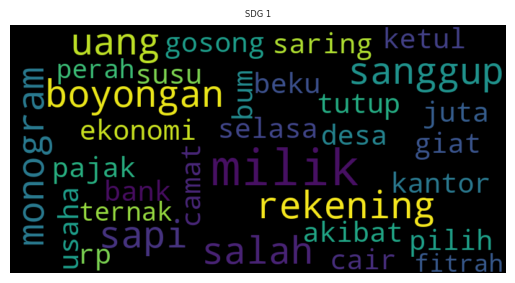

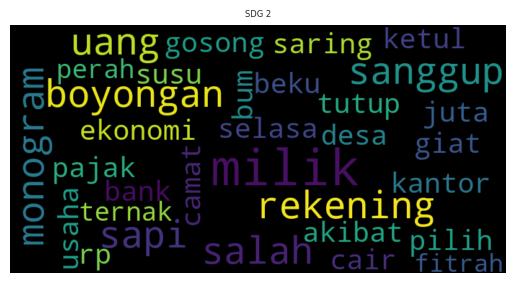

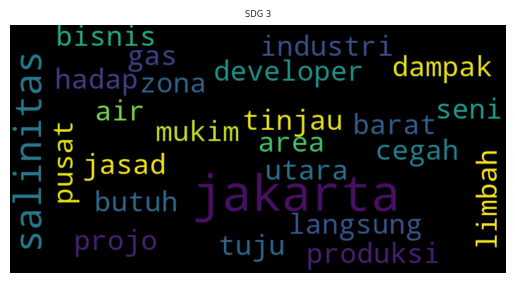

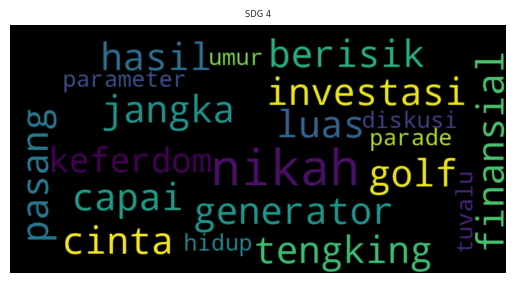

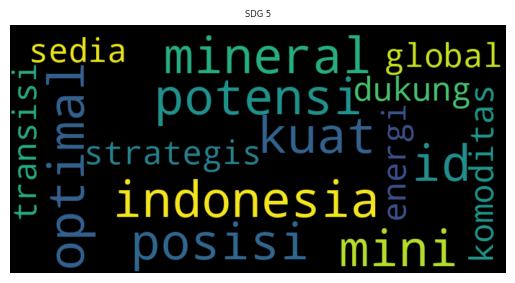

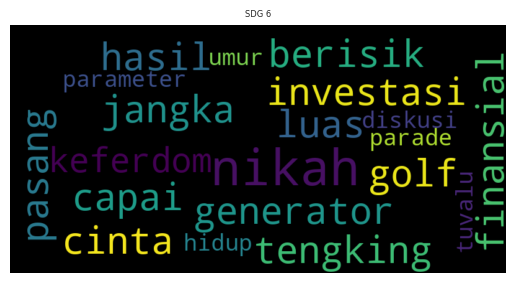

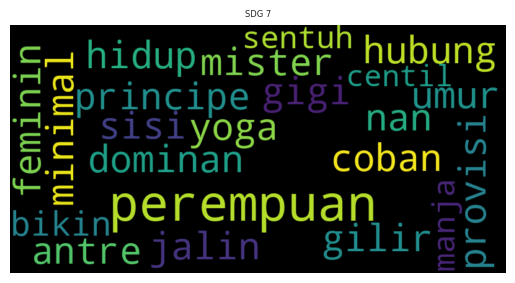

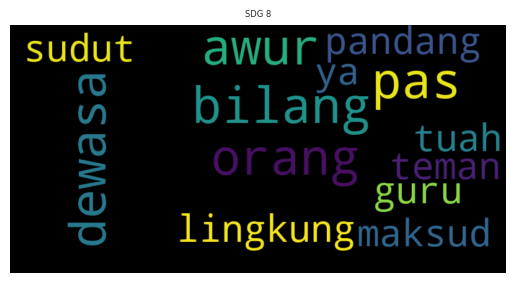

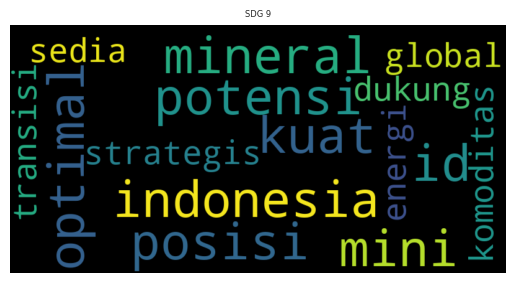

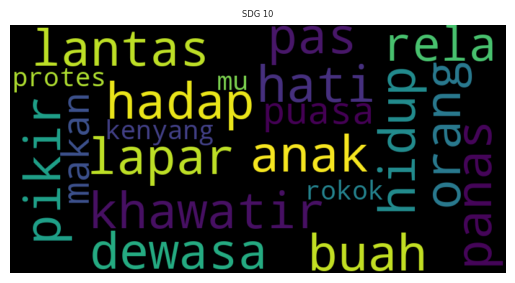

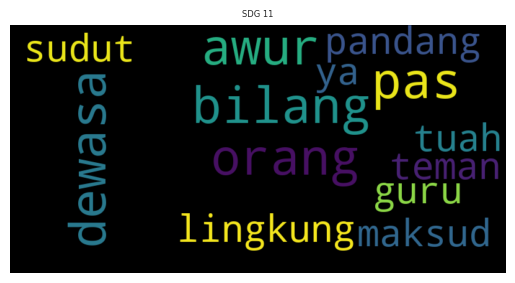

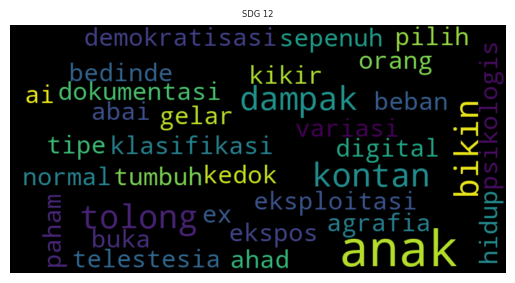

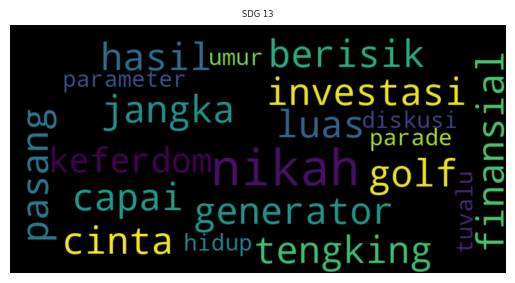

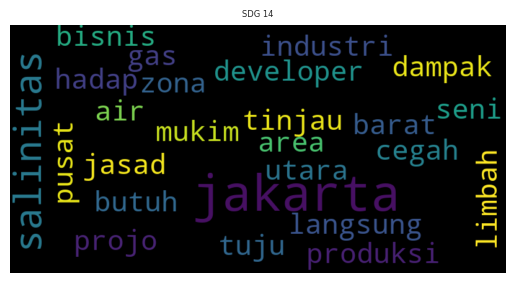

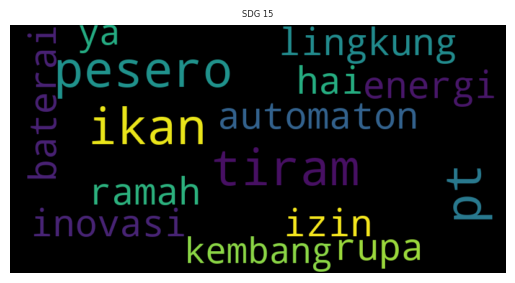

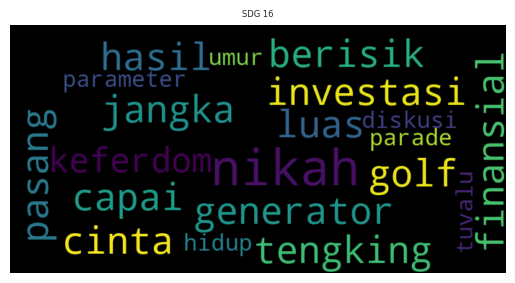

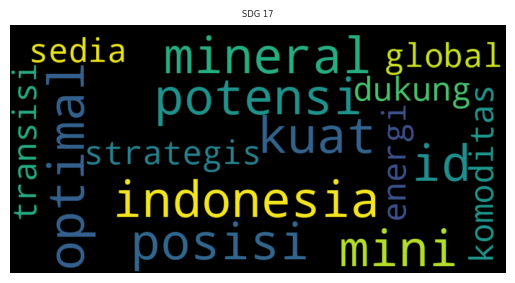

<Figure size 640x480 with 0 Axes>

In [ ]:
clist = pd.DataFrame(clist)
for i in range(1, 18):
  generateWordCloud(corpus = ''.join(str(clist[0][i-1])), cmap = 'viridis', title = "SDG " + str(i))

##Training and Testing the ComplementNB Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import numpy as np

X = words_join.values
y = df.iloc[:, 3:].values

tfidf = TfidfVectorizer(max_features = 4500, binary=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

input_test = pd.Series(X_test)
vectorizer = CountVectorizer()

X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()



In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import LinearSVC
import sklearn.metrics
from sklearn.metrics import classification_report


complement_classifier = MultiOutputClassifier(ComplementNB(class_prior=[.35, .4])).fit(X_train, y_train)


y_pred = complement_classifier.predict(X_test)
y_prob = np.asarray(complement_classifier.predict_proba(X_test))

max_labels = 3
limited_y_pred = np.zeros((y_prob.shape[1], y_prob.shape[0]), dtype=int)
#get top indices/highest probability
for i in range(y_prob.shape[1]):
    top_indices = np.argsort(-y_prob[:, i])[:max_labels]
    limited_y_pred[i, top_indices] = 1

##ComplementNB Evaluation

In [ ]:
y_true = y_test
classification_report = classification_report(y_true, y_pred)
print('Exact Match Ratio: {0}'.format(sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)))
print('0/1 Loss: {0}'.format(sklearn.metrics.zero_one_loss(y_true, y_pred, normalize=True, sample_weight=None)))
print('Hamming loss: {0}'.format(sklearn.metrics.hamming_loss(y_true, y_pred)))
print('F1 Measure: {0}'.format(sklearn.metrics.f1_score(y_true=y_true, y_pred=y_pred, average='samples')))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

Exact Match Ratio: 0.06521739130434782
0/1 Loss: 0.9347826086956522
Hamming loss: 0.1534526854219949
F1 Measure: 0.3480331262939958

Classification Report

               precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.12      0.12      0.12         8
           2       0.11      0.33      0.17         3
           3       0.33      0.40      0.36         5
           4       0.25      0.33      0.29         3
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.67      0.17      0.27        12
           8       0.33      0.29      0.31         7
           9       0.50      0.50      0.50         6
          10       0.56      0.50      0.53        10
          11       0.40      0.20      0.27        10
          12       0.67      0.50      0.57         4
          13       0.33      0.25      0.29         4
          14       0.50      0.6

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cnb_cm = multilabel_confusion_matrix(y_true, y_pred)

In [ ]:
from numpy import count_nonzero
print(count_nonzero(np.multiply(y_true, y_pred)))

38


In [ ]:
ones = np.ones(y_true.shape, dtype=int)
y_total = np.array((y_true  + y_pred))
print(np.count_nonzero(y_total == 0))
print(np.count_nonzero(y_total == 1))
print(np.count_nonzero(y_total == 2))

624
120
38


In [ ]:
ones = np.ones(y_true.shape, dtype=int)
y_total = np.array((y_true  - y_pred))
print(np.count_nonzero(y_total == 0))
print(np.count_nonzero(y_total == 1))
print(np.count_nonzero(y_total == -1))

662
68
52


In [ ]:
from numpy import count_nonzero
y_sub = np.array((y_true  - y_pred))
y_add = np.array((y_true  + y_pred))

true_and_pred = np.multiply(y_true, y_pred)
tp_sum = count_nonzero(true_and_pred)
pred_sum = count_nonzero(y_pred)
true_sum = count_nonzero(y_true)

fp = count_nonzero(y_sub == -1)
fn = count_nonzero(y_sub == 1)
tp = count_nonzero(y_add == 2)
tn = count_nonzero(y_add == 0)

print(fp, fn, tp, tn)

52 68 38 624


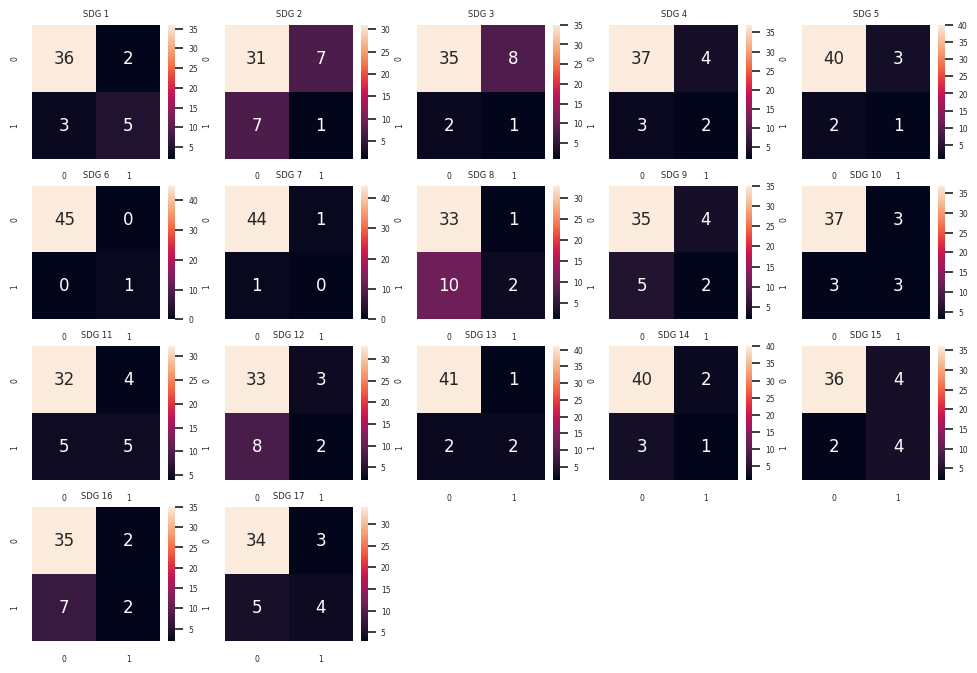

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes =plt.subplots(4,5, figsize=(12, 8))
sns.set(font_scale=0.5)

for i, ax in enumerate(axes.flat):
    ax.set_title(f'SDG {i+1}')

for ax, x in zip(axes.ravel(), cnb_cm):
  sns.heatmap(x, annot=True,annot_kws={"size": 12}, ax=ax)

fig.delaxes(axes[3][2])
fig.delaxes(axes[3][3])
fig.delaxes(axes[3][4])


###ComplementNB Analysis

In [ ]:
probas = complement_classifier.predict_proba(X_test)
valid_probas = []

for i, p in enumerate(probas):
    # Check if the array is 1D or contains only 1.0
    if (p.ndim == 2 and np.all(p == 1.0)) :
        new_column = np.full((p.shape[0], 1), 0)  # New column
        modified_p = np.hstack((p, new_column))
        valid_probas.append(modified_p)

    else:
        valid_probas.append(p)

In [ ]:
classes = df.columns[3:]
probabilities = pd.DataFrame(np.matrix.transpose(np.array(y_prob)[:, :, 1])).map(lambda x: f'{x:,.0%}', na_action='ignore')
results = input_test.to_frame().merge(probabilities, left_index=True, right_index=True)
results.columns = results.columns[:1].tolist() + classes.tolist()
results

,0_x,1,10,11,12,13,14,15,16,17,2,3,4,5,6,7,8,9
0,hai izin automaton tiram pt ikan pesero tiram ...,20%,24%,37%,25%,42%,30%,28%,24%,39%,23%,24%,21%,20%,27%,55%,22%,46%
1,rangka penuh target janji kerja salah nilai zo...,26%,34%,34%,33%,23%,24%,23%,32%,38%,28%,21%,36%,19%,34%,39%,26%,36%
2,tinjau jakarta developer projo jasad zona tuju...,34%,42%,65%,33%,36%,35%,44%,26%,49%,33%,26%,31%,31%,64%,42%,32%,52%
3,milik monogram boyongan monogram pilih tutup u...,52%,49%,38%,37%,30%,24%,27%,33%,41%,33%,33%,35%,26%,31%,29%,49%,34%
4,mini id optimal potensi mineral indonesia kuat...,28%,28%,60%,35%,48%,37%,40%,31%,51%,47%,35%,34%,32%,45%,70%,33%,49%
5,orang dewasa lingkung ya pas bilang pas awur m...,30%,31%,28%,28%,25%,25%,23%,44%,29%,35%,57%,29%,36%,24%,24%,35%,28%
6,lucu ya bayar pajak kendara motor selesma onli...,42%,46%,45%,35%,29%,28%,29%,45%,41%,33%,30%,31%,39%,36%,32%,36%,39%
7,pontianak layak hasil tiru modifikasi jabat po...,35%,39%,49%,26%,18%,25%,24%,32%,24%,30%,26%,36%,23%,37%,19%,28%,30%
8,khawatir orang hadap buah hati anak lapar lant...,51%,38%,27%,36%,28%,26%,28%,45%,29%,48%,53%,43%,31%,26%,28%,38%,30%
9,pasang investasi jangka berisik nikah cinta ni...,44%,40%,40%,55%,50%,45%,44%,34%,53%,47%,47%,43%,50%,46%,54%,52%,47%


In [ ]:
probs = complement_classifier.predict_proba(X_test)
probs = np.matrix.transpose(np.array(probs)[:, :, 1])
predicted_binary = np.zeros((len(probs), len(lb.classes_)), dtype=int)

# Get top three labels for the new sample
top_classes = []
for i, prob in enumerate(probs):
    # Get the indices of the top three probabilities for each label
    prob_df = pd.DataFrame(prob)
    if (prob_df[0] > 0.5).any() :
      prob_df = prob_df.drop(prob_df[prob_df[0] < 0.5].index)
    else:
      continue
    if (prob_df[0] > 0.47).any() :
      top_indices = prob_df[0].nlargest(4).index
    else:
      top_indices = prob_df[0].nlargest(2).index

    top_classes.append(lb.classes_[top_indices])
    predicted_binary[i, top_indices] = 1
# Display results
for i, classes in enumerate(top_classes):
    print(f"{input_test[i+1][:35]}...: {classes}")


rangka penuh target janji kerja sal...: [15]
tinjau jakarta developer projo jasa...: [ 3 14 17]
milik monogram boyongan monogram pi...: [1]
mini id optimal potensi mineral ind...: [15  3  9]
orang dewasa lingkung ya pas bilang...: [11]
lucu ya bayar pajak kendara motor s...: [11  1]
pontianak layak hasil tiru modifika...: [ 4 15  9 16]
khawatir orang hadap buah hati anak...: [11]
pasang investasi jangka berisik nik...: [11  8 12]
teman teman penuh bawa bawa teman d...: [10]
bedinde telestesia klasifikasi ai e...: [8 1]
bilang kosong masak boros idealis p...: [12  1  5  4]
potret hukum indonesia orang nenek ...: [11]
sisik gugus tolong habis pakai ch g...: [13 11  4 10]
suka bedama orang duit haram epilep...: [1 2]
gilir minimal umur hidup coban jali...: [15  5]
miskin bodoh mampan negara berantas...: [2]
tukang ac kuliah ajar hemat pangera...: [10 11 13  4]
air mineral muhammad organisasi dak...: [15 17  5  4]
lihat oknum tindak pidana cuci uang...: [8]
pura henti ceriwis ramai boikot 

### WordCloud

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt, seaborn as sb

In [ ]:
def generateWordCloud(corpus: str, cmap: str, title : str) -> wordcloud:
    """
    Return a Word Cloud object generated from the corpus and color map parameter.
    """
    wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      colormap = cmap, max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 0)

    wordcloud.generate(corpus)
    plt.title(title)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figure()

    return wordcloud

In [ ]:
pred_class = lb.inverse_transform(y_pred)
pred_class = pd.DataFrame(pred_class)
pred_class

In [ ]:
pred_class = lb.inverse_transform(y_pred)
pred_class = pd.DataFrame(pred_class)
class_predict = input_test.to_frame().merge(pred_class, left_index=True, right_index=True)
class_predict.columns[1:]

Index(['0_y', 1, 2, 3, 4, 5, 6], dtype='object')

In [ ]:
clist = [[] for i in range(17)]
for  idx, row in class_predict.iterrows():
  for col in class_predict.columns[1:]:
    for i in range(1, 18):
      if class_predict.loc[idx, col] is not np.nan:
        if class_predict.loc[idx, col] == i :
          clist[i-1].append(class_predict.iloc[idx, 0])
print(clist)

[['milik monogram boyongan monogram pilih tutup usaha sanggup giat ekonomi salah kantor pajak beku rekening sanggup ketul susu sapi desa saring camat gosong boyongan selasa akibat uang milik rp juta rekening salah bank milik bum cair uang milik ternak sapi perah fitrah', 'khawatir orang hadap buah hati anak lapar lantas pikir dewasa hidup pas panas rela puasa makan kenyang mu rokok protes', 'potret hukum indonesia orang nenek miskin tuduh ambil kayu milik tani tahan adil ampun adil ancam pernis penjara koruptor kaya rugi negara ratus triliun hukum penjara', 'sisik gugus tolong habis pakai ch gedung tanggung sampan cermin habis pakai deregulasi pinjam gedung susun kampus amis awar sampah', 'miskin bodoh mampan negara berantas linglung buah profesi linglung daerah bantal bekas malam resah supir sokoguru terang media', 'bukti roket fakultas dokter muat dokter indonesia tenang sedia dokter dokter asing tamat sma kuliah butuh tersier miskin gotong kuliah ambil pinjam bawat dokter asing ya i

In [ ]:
clist = pd.DataFrame(clist)

In [ ]:
clist[0][2]

'tinjau jakarta developer projo jasad zona tuju cegah dampak langsung mukim area bisnis industri hadap air salinitas produksi limbah seni butuh salinitas jakarta pusat jakarta barat jakarta utara gas'

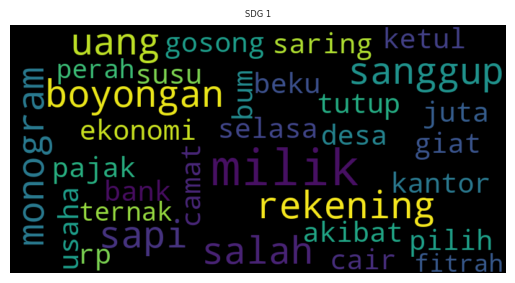

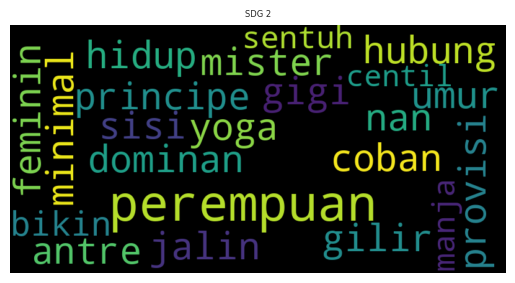

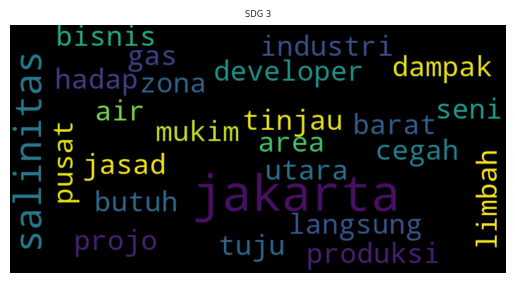

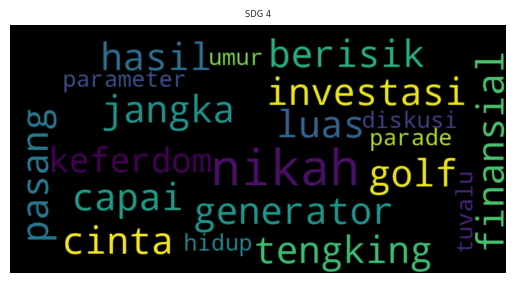

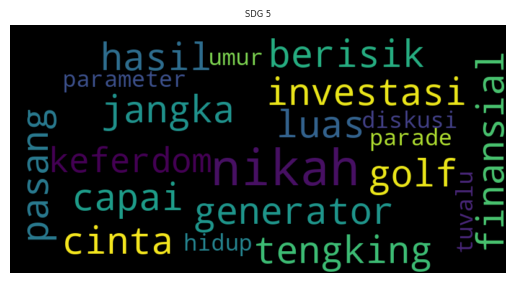

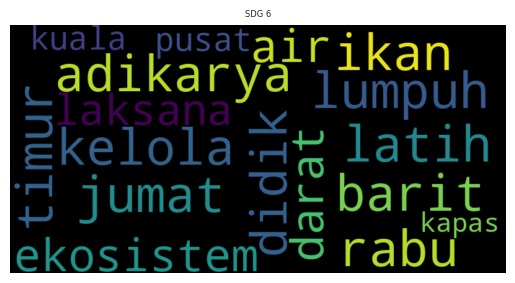

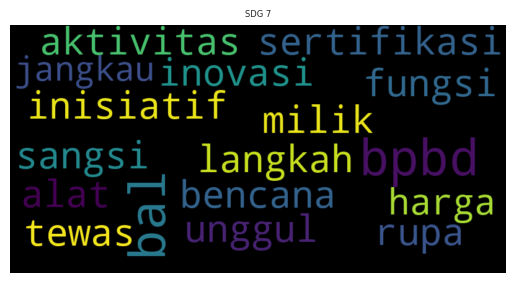

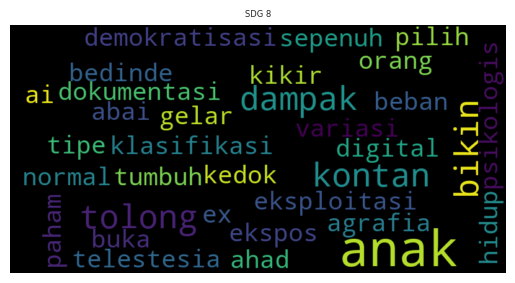

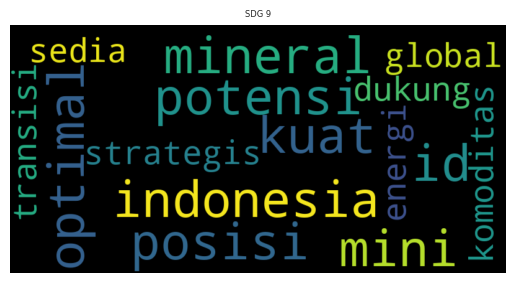

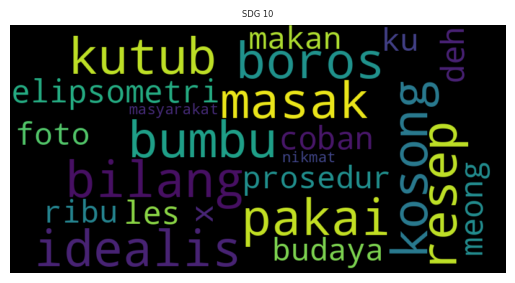

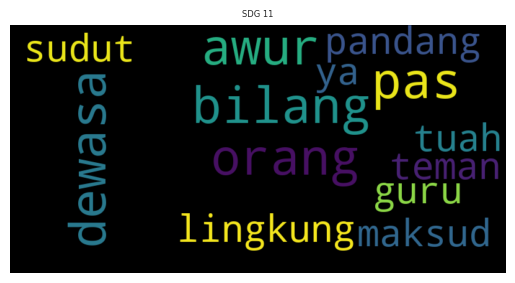

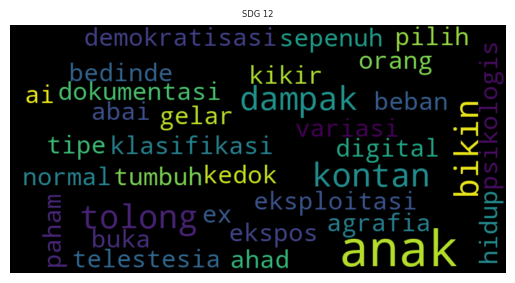

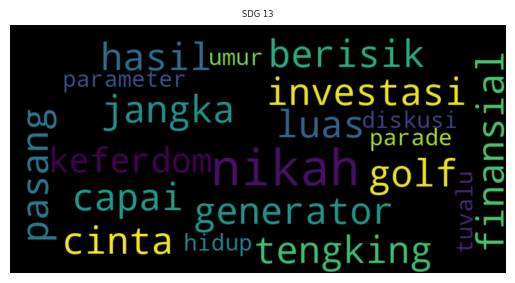

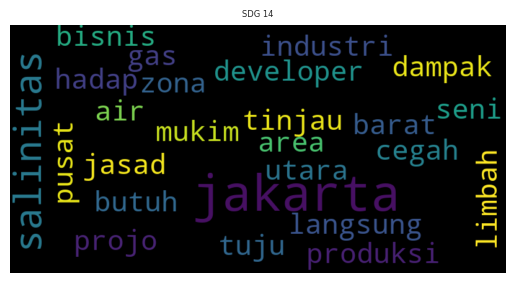

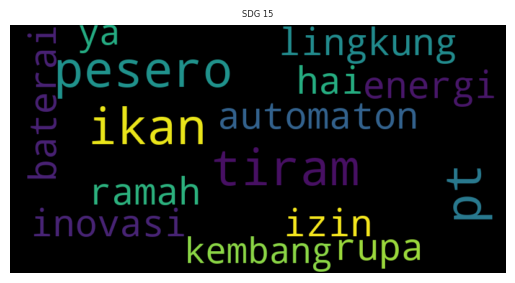

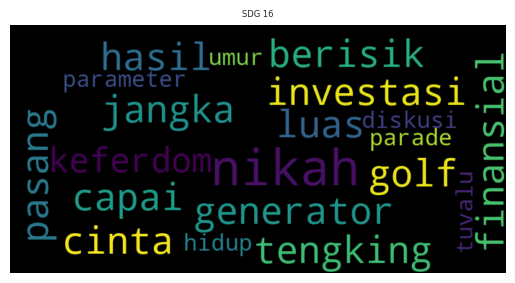

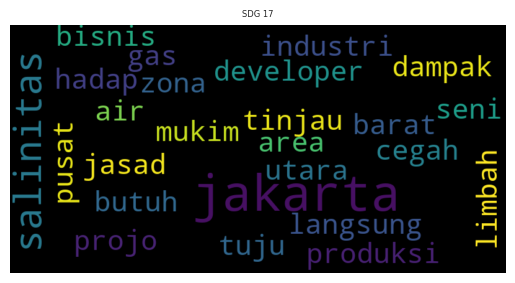

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(1, 18):
  generateWordCloud(corpus = ''.join(str(clist[0][i-1])), cmap = 'viridis', title = "SDG " + str(i))